In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
catalog = np.loadtxt("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2014ck/dolphot/dp.out")

In [4]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < 3    3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 3)&(abs(catalog[i][6]) < .3)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)):
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/sn2014ck_Prediction.reg", pos_predict, '%5.2f')

In [5]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_200pc.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([28,2])
for i in range(28):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
infoF3 = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        infoF3[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

In [6]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_133pc.reg", "r+")

text = asci.readlines()
region = np.zeros([12,2])
for i in range(12):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF2 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF3.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF3[i][2:4]):
        infoF2[j] = infoF3[i]
        j = j + 1
        if j == region.shape[0]: break

In [7]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_67pc.reg", "r+")

text = asci.readlines()
region = np.zeros([1,2])
for i in range(1):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF1 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF2.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF2[i][2:4]):
        infoF1[j] = infoF2[i]
        j = j + 1
        if j == region.shape[0]: break

[-1, 4, 28, 22]

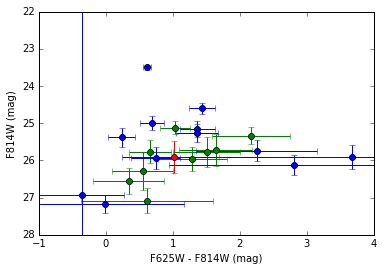

In [8]:
for i in range(infoF3.shape[0]):
    for j in range(infoF2.shape[0]):
        if np.array_equal(infoF3[i],infoF2[j]):
            infoF3[i] = np.zeros(infoF3[i].size)
for i in range(infoF2.shape[0]):
    for j in range(infoF1.shape[0]):
        if np.array_equal(infoF2[i],infoF1[j]):
            infoF2[i] = np.zeros(infoF2[i].size)

infoF2 = infoF2[~np.all(infoF2 == 0, axis=1)]
infoF3 = infoF3[~np.all(infoF3 == 0, axis=1)]

F625W_F1 = infoF1[:,15]
xerr2_F1 = np.sqrt(infoF1[:,17]**2 + infoF1[:,30]**2)
F814W_F1 = infoF1[:,28]
yerr2_F1 = infoF1[:,56]

F625W_F2 = infoF2[:,15]
xerr2_F2 = np.sqrt(infoF2[:,17]**2 + infoF2[:,30]**2)
F814W_F2 = infoF2[:,28]
yerr2_F2 = infoF2[:,56]

F625W_F3 = infoF3[:,15]
xerr2_F3 = np.sqrt(infoF3[:,17]**2 + infoF3[:,30]**2)
F814W_F3 = infoF3[:,28]
yerr2_F3 = infoF3[:,56]

line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)

plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F625W - F814W (mag)')
plt.ylabel('F814W (mag)')
plt.axis([-1,4,28,22])

In [9]:
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

In [10]:
kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

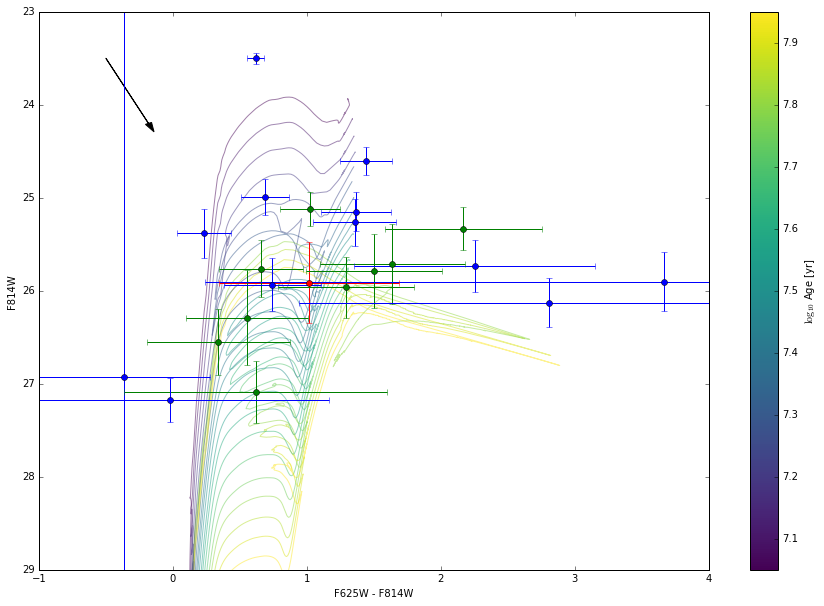

In [11]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7) & (ages < 8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(24.4e6) - 1)
    F625W_ext = 1.018 # extinction in F625W in UGC 12182 from NED
    F814W_ext = 0.700 # extinction in F814W in UGC 12182 from NED
    Gal_ext = 0
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)
#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
# Plots reddening vector
plt.arrow(-0.5, 23.5, F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext, F814W_ext + 1.526*Gal_ext,
          head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(29,23)
plt.xlim(-1, 4)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Removing clusters

In [12]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2014ck/sn2014ck_f625w_lacosmic.fits.mag.1")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2014ck/sn2014ck_f625w_lacosmic.fits.mag.2")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(28)
for i in range(28):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [13]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_200pc.reg", "r+")
text = asci.readlines()

region = np.zeros([28,2])
for i in range(28):
    A = mysplit(text[i+3], ' # ')
    region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        info[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

(29, 23)

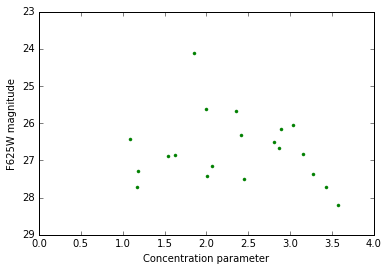

In [22]:
# Plots the concentration parameter vs magnitude
plt.plot(concentration, info[:,15], 'g.')
plt.xlabel('Concentration parameter')
plt.ylabel('F625W magnitude')
plt.xlim(0,4)
plt.ylim(29,23)

In [23]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(28):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [24]:
np.savetxt("New_Start(2017)/sn2014ck_NoClustersROI.reg", new_info[:,2:4], '%5.2f')

In [38]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_NoClustersROI_133pc.reg", "r+")
text = asci.readlines()
region = np.zeros([15,2])

for i in range(8):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info2 = np.zeros([region.shape[0], new_info.shape[1]])

j = 0 # Iteration variable for region array
for i in range(new_info.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info[i][2])&(region[j][1] == new_info[i][3]):
        new_info2[j] = new_info[i]
        j = j + 1
        if j == region.shape[0]: break

asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2014ck_NoClustersROI_67pc.reg", "r+")
text = asci.readlines()
region = np.zeros([8,2])

for i in range(1):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info3 = np.zeros([region.shape[0], new_info.shape[1]])

j = 0 # Iteration variable for region array
for i in range(new_info.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info[i][2])&(region[j][1] == new_info[i][3]):
        new_info3[j] = new_info[i]
        j = j + 1
        if j == region.shape[0]: break
                
                
for i in range(new_info.shape[0]):
    for j in range(new_info2.shape[0]):
        if np.array_equal(new_info[i],new_info2[j]):
            new_info[i] = np.zeros(new_info[i].size)
for i in range(new_info2.shape[0]):
    for j in range(new_info3.shape[0]):
        if np.array_equal(new_info2[i],new_info3[j]):
            new_info2[i] = np.zeros(new_info2[i].size)
            
new_info2 = new_info2[~np.all(new_info2 == 0, axis=1)]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [39]:
# Reddening, metallicity, and distance errors
dist_lower = 5 * (np.log10(24.32e6 - 1.77e6) - 1)
dist_upper = 5 * (np.log10(24.32e6 + 1.77e6) - 1)
red_lower = 0
red_upper = 0
metal_lower = -0.50
metal_upper = -0.50

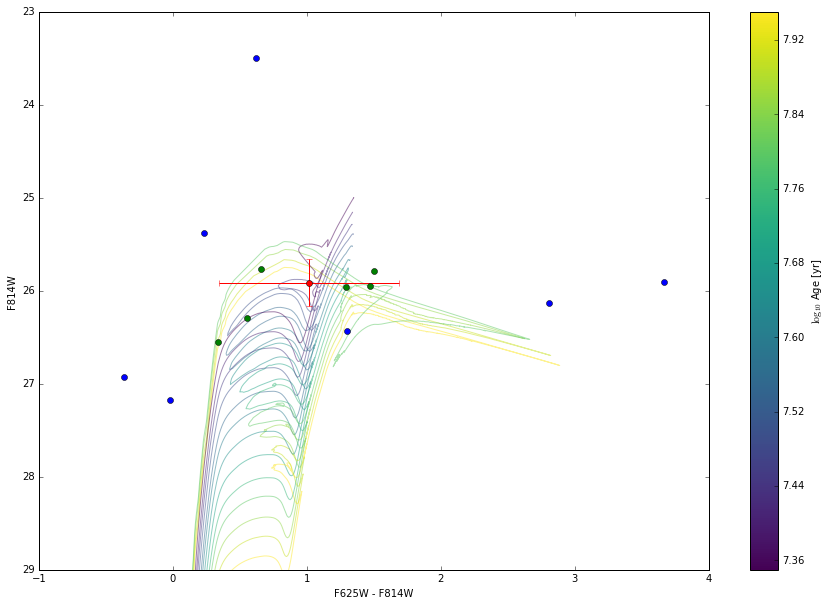

In [46]:
# fix metallicity, vary age
df = isochrones[-0.50]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.3) & (ages < 8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(24.4e6) - 1)
    F625W_ext = 1.018 # extinction in F625W in UGC 12182 from NED
    F814W_ext = 0.700 # extinction in F814W in UGC 12182 from NED
    Gal_ext = 0
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    #plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,15] - new_info3[:,28], new_info3[:,28], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,17]**2 + new_info3[:,30]**2), yerr=new_info3[:,30])
#line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
#                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line2 = plt.plot(new_info2[:,15] - new_info2[:,28], new_info2[:,28], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info[:,15] - new_info[:,28], new_info[:,28], 'bo')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(29,23)
plt.xlim(-1, 4)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')